## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

## Importing Data

In [2]:
df = pd.read_excel("basics/ALL.xlsx") 
df

,DATE,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK,POILBREUSDQ,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ
0,1995-01-01,1836.1140,7522.29,514939.7,20.98,125.52,90.79,5.74,6.04,0.30,17.05,18.35,16.30,2.59,1.51,3.57
1,1995-04-01,1846.6928,7581.00,518751.3,14.98,81.38,73.45,5.60,5.62,0.33,18.29,19.29,16.95,2.69,1.64,3.79
2,1995-07-01,1853.1124,7683.12,525367.1,15.00,83.91,75.01,5.37,5.36,0.36,16.34,17.86,15.34,2.77,1.53,3.43
3,1995-10-01,1859.6108,7772.59,527012.8,17.18,89.63,85.17,5.26,5.24,0.33,17.11,18.16,15.93,2.73,2.14,3.43
4,1996-01-01,1862.0208,7868.47,529099.0,21.11,112.34,79.71,4.93,4.88,0.56,18.60,19.77,16.56,2.68,3.23,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2022-07-01,2762.7585,25994.64,554145.9,18.51,376.21,174.78,2.66,3.15,8.42,97.83,93.34,95.25,58.77,7.91,46.67
111,2022-10-01,2762.0460,26408.40,561439.4,20.09,351.79,161.86,4.04,4.40,8.47,88.72,82.65,84.22,28.32,6.11,28.56
112,2023-01-01,2763.2191,26813.60,574146.4,23.37,292.98,139.71,4.63,4.75,8.22,82.32,76.21,80.15,16.83,2.77,16.67
113,2023-04-01,2767.3240,27063.01,588678.7,21.28,252.32,145.53,5.07,5.00,7.59,78.09,73.70,77.64,11.32,2.33,10.67


## Testing Co-Linearities

In [3]:
selected_columns = ['CLVMEURSCAB1GQEA19', 'GDP', 'JPNNGDP', 'EMVOVERALLEMV', 'EUEPUINDXM','USEPUINDXM','TB3MS', 'TB6MS','INFECTDISEMVTRACK']
# Create a new DataFrame with selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
correlation_matrix

,CLVMEURSCAB1GQEA19,GDP,JPNNGDP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,TB3MS,TB6MS,INFECTDISEMVTRACK
CLVMEURSCAB1GQEA19,1.000000,0.953391,0.375259,-0.118045,0.715585,0.502724,-0.546623,-0.539715,0.339844
GDP,0.953391,1.000000,0.453924,-0.114405,0.811191,0.555045,-0.486979,-0.480791,0.497429
JPNNGDP,0.375259,0.453924,1.000000,-0.037268,0.314191,-0.133036,0.358756,0.363010,0.268911
EMVOVERALLEMV,-0.118045,-0.114405,-0.037268,1.000000,0.053577,0.373717,0.085160,0.084842,0.279372
EUEPUINDXM,0.715585,0.811191,0.314191,0.053577,1.000000,0.694573,-0.475000,-0.467756,0.458281
USEPUINDXM,0.502724,0.555045,-0.133036,0.373717,0.694573,1.000000,-0.578440,-0.581683,0.629958
TB3MS,-0.546623,-0.486979,0.358756,0.085160,-0.475000,-0.578440,1.000000,0.998558,-0.196002
TB6MS,-0.539715,-0.480791,0.363010,0.084842,-0.467756,-0.581683,0.998558,1.000000,-0.197875
INFECTDISEMVTRACK,0.339844,0.497429,0.268911,0.279372,0.458281,0.629958,-0.196002,-0.197875,1.000000


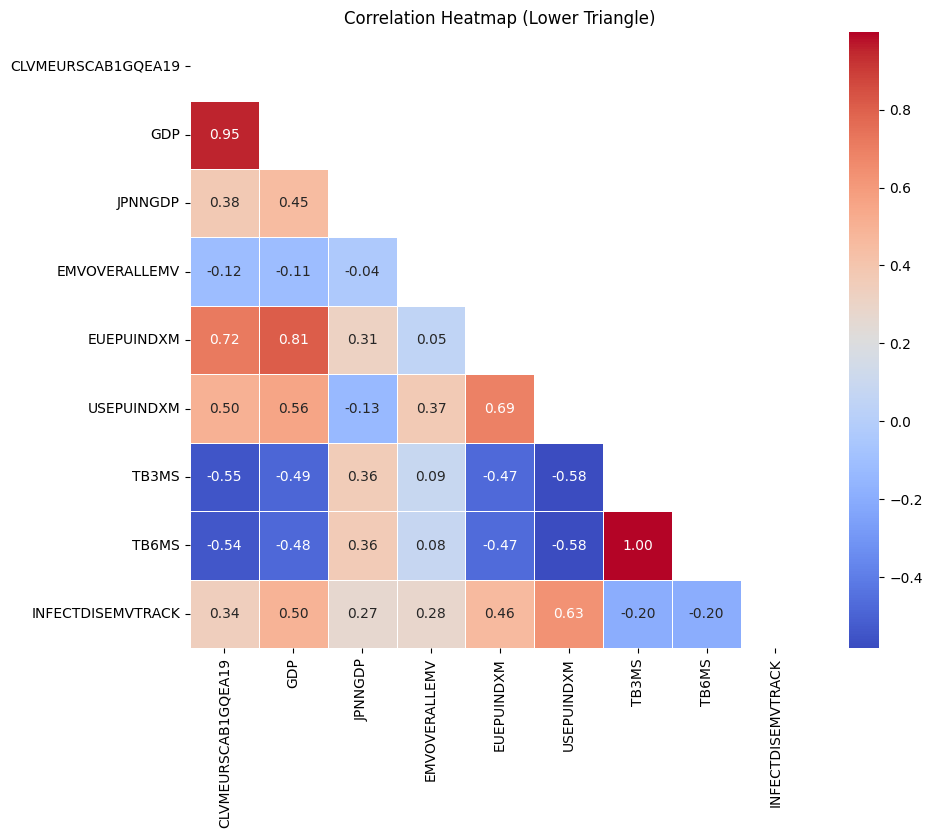

In [4]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [5]:
vif_data = pd.DataFrame()
vif_data["Variable"] = selected_df.columns
vif_data["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(selected_df.shape[1])]

# Display the VIF data
vif_data

,Variable,VIF
0,CLVMEURSCAB1GQEA19,1944.947775
1,GDP,266.705747
2,JPNNGDP,994.233864
3,EMVOVERALLEMV,19.363056
4,EUEPUINDXM,37.979462
5,USEPUINDXM,53.325615
6,TB3MS,838.206769
7,TB6MS,865.769206
8,INFECTDISEMVTRACK,4.587211


## Fixing Co-Linearity issues

In [6]:
selected_columns = ['GDP', 'EMVOVERALLEMV','TB3MS','INFECTDISEMVTRACK']
# Create a new DataFrame with selected columns
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Display the correlation matrix
correlation_matrix

,GDP,EMVOVERALLEMV,TB3MS,INFECTDISEMVTRACK
GDP,1.000000,-0.114405,-0.486979,0.497429
EMVOVERALLEMV,-0.114405,1.000000,0.085160,0.279372
TB3MS,-0.486979,0.085160,1.000000,-0.196002
INFECTDISEMVTRACK,0.497429,0.279372,-0.196002,1.000000


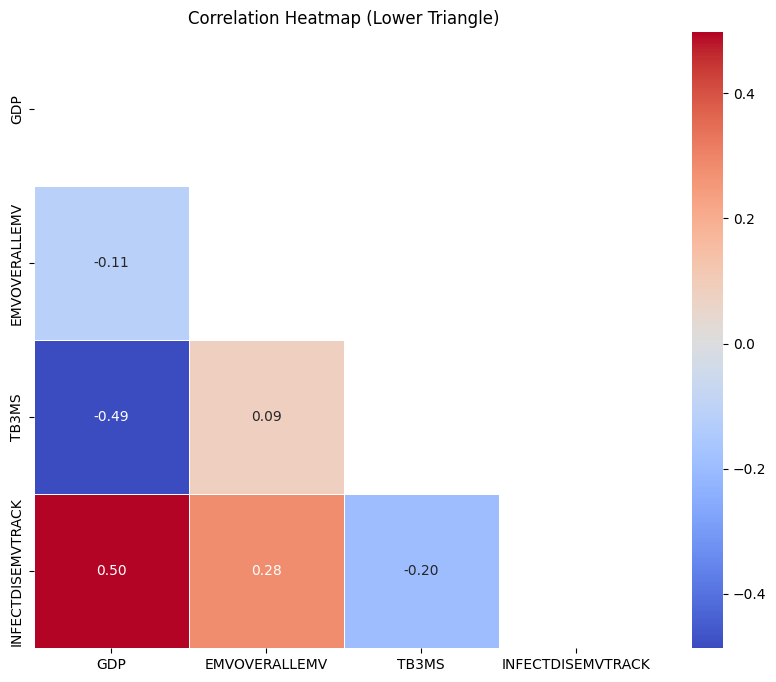

In [7]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

In [8]:
vif_data = pd.DataFrame()
vif_data["Variable"] = selected_df.columns
vif_data["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(selected_df.shape[1])]

# Display the VIF data
vif_data

,Variable,VIF
0,GDP,5.550232
1,EMVOVERALLEMV,6.998804
2,TB3MS,2.202706
3,INFECTDISEMVTRACK,1.468898


## Differencing to achive stationarity

In [9]:
selected_columns = ['DATE','GDP', 'EMVOVERALLEMV', 'TB3MS','INFECTDISEMVTRACK',
                    "POILBREUSDQ", "POILWTIUSDQ", "POILDUBUSDQ", "PNGASEUUSDQ", "PNGASUSUSDQ","PNGASJPUSDQ"]
pruned_df = df[selected_columns]

pruned_df["POILBREUSDQ_LAG1"] = df["POILBREUSDQ"].shift(1)
pruned_df["POILWTIUSDQ_LAG1"] = df["POILWTIUSDQ"].shift(1)
pruned_df["POILDUBUSDQ_LAG1"] = df["POILDUBUSDQ"].shift(1)
pruned_df["PNGASEUUSDQ_LAG1"] = df["PNGASEUUSDQ"].shift(1)
pruned_df["PNGASUSUSDQ_LAG1"] = df["PNGASUSUSDQ"].shift(1)
pruned_df["PNGASJPUSDQ_LAG1"] = df["PNGASJPUSDQ"].shift(1)

pruned_df["POILBREUSDQ_LAG2"] = df["POILBREUSDQ"].shift(2)
pruned_df["POILWTIUSDQ_LAG2"] = df["POILWTIUSDQ"].shift(2)
pruned_df["POILDUBUSDQ_LAG2"] = df["POILDUBUSDQ"].shift(2)
pruned_df["PNGASEUUSDQ_LAG2"] = df["PNGASEUUSDQ"].shift(2)
pruned_df["PNGASUSUSDQ_LAG2"] = df["PNGASUSUSDQ"].shift(2)
pruned_df["PNGASJPUSDQ_LAG2"] = df["PNGASJPUSDQ"].shift(2)

pruned_df["POILBREUSDQ_LAG3"] = df["POILBREUSDQ"].shift(3)
pruned_df["POILWTIUSDQ_LAG3"] = df["POILWTIUSDQ"].shift(3)
pruned_df["POILDUBUSDQ_LAG3"] = df["POILDUBUSDQ"].shift(3)
pruned_df["PNGASEUUSDQ_LAG3"] = df["PNGASEUUSDQ"].shift(3)
pruned_df["PNGASUSUSDQ_LAG3"] = df["PNGASUSUSDQ"].shift(3)
pruned_df["PNGASJPUSDQ_LAG3"] = df["PNGASJPUSDQ"].shift(3)

pruned_df["POILBREUSDQ_LAG4"] = df["POILBREUSDQ"].shift(4)
pruned_df["POILWTIUSDQ_LAG4"] = df["POILWTIUSDQ"].shift(4)
pruned_df["POILDUBUSDQ_LAG4"] = df["POILDUBUSDQ"].shift(4)
pruned_df["PNGASEUUSDQ_LAG4"] = df["PNGASEUUSDQ"].shift(4)
pruned_df["PNGASUSUSDQ_LAG4"] = df["PNGASUSUSDQ"].shift(4)
pruned_df["PNGASJPUSDQ_LAG4"] = df["PNGASJPUSDQ"].shift(4)


pruned_df.set_index('DATE', inplace=True)
pruned_df.dropna(inplace=True)
pruned_df

C:\Users\FURIOUS\AppData\Local\Temp\ipykernel_10972\1857817572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned_df["POILBREUSDQ_LAG1"] = df["POILBREUSDQ"].shift(1)
C:\Users\FURIOUS\AppData\Local\Temp\ipykernel_10972\1857817572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned_df["POILWTIUSDQ_LAG1"] = df["POILWTIUSDQ"].shift(1)
C:\Users\FURIOUS\AppData\Local\Temp\ipykernel_10972\1857817572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,GDP,EMVOVERALLEMV,TB3MS,INFECTDISEMVTRACK,POILBREUSDQ,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ,...,POILDUBUSDQ_LAG3,PNGASEUUSDQ_LAG3,PNGASUSUSDQ_LAG3,PNGASJPUSDQ_LAG3,POILBREUSDQ_LAG4,POILWTIUSDQ_LAG4,POILDUBUSDQ_LAG4,PNGASEUUSDQ_LAG4,PNGASUSUSDQ_LAG4,PNGASJPUSDQ_LAG4
DATE,,,,,,,,,,,,,,,,,,,,,
1996-01-01,7868.47,21.11,4.93,0.56,18.60,19.77,16.56,2.68,3.23,3.72,...,16.95,2.69,1.64,3.79,17.05,18.35,16.30,2.59,1.51,3.57
1996-04-01,8032.84,16.92,5.02,0.46,19.70,21.75,17.30,2.69,2.33,3.81,...,15.34,2.77,1.53,3.43,18.29,19.29,16.95,2.69,1.64,3.79
1996-07-01,8131.41,18.86,5.10,0.50,21.13,22.38,18.86,2.69,2.14,3.82,...,15.93,2.73,2.14,3.43,16.34,17.86,15.34,2.77,1.53,3.43
1996-10-01,8259.77,18.46,4.98,0.32,23.80,24.71,21.38,2.94,3.06,4.26,...,16.56,2.68,3.23,3.72,17.11,18.16,15.93,2.73,2.14,3.43
1997-01-01,8362.66,21.16,5.06,0.70,21.36,22.80,19.49,2.90,2.44,4.27,...,17.30,2.69,2.33,3.81,18.60,19.77,16.56,2.68,3.23,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,25994.64,18.51,2.66,8.42,97.83,93.34,95.25,58.77,7.91,46.67,...,77.65,31.52,4.85,34.82,73.25,70.67,71.21,16.68,4.31,18.27
2022-10-01,26408.40,20.09,4.04,8.47,88.72,82.65,84.22,28.32,6.11,28.56,...,94.19,32.20,4.56,31.13,79.81,77.42,77.65,31.52,4.85,34.82
2023-01-01,26813.60,23.37,4.63,8.22,82.32,76.21,80.15,16.83,2.77,16.67,...,107.49,30.79,7.49,26.83,97.44,94.43,94.19,32.20,4.56,31.13


In [10]:
level_diff_columns = ['EMVOVERALLEMV', 'TB3MS']
log_diff_columns = ["GDP","INFECTDISEMVTRACK",
                    "POILBREUSDQ", "POILWTIUSDQ", "POILDUBUSDQ", "PNGASEUUSDQ", "PNGASUSUSDQ","PNGASJPUSDQ",
                    "POILBREUSDQ_LAG1", "POILWTIUSDQ_LAG1", "POILDUBUSDQ_LAG1", "PNGASEUUSDQ_LAG1", "PNGASUSUSDQ_LAG1","PNGASJPUSDQ_LAG1",
                    "POILBREUSDQ_LAG2", "POILWTIUSDQ_LAG2", "POILDUBUSDQ_LAG2", "PNGASEUUSDQ_LAG2", "PNGASUSUSDQ_LAG2","PNGASJPUSDQ_LAG2",
                    "POILBREUSDQ_LAG3", "POILWTIUSDQ_LAG3", "POILDUBUSDQ_LAG3", "PNGASEUUSDQ_LAG3", "PNGASUSUSDQ_LAG3","PNGASJPUSDQ_LAG3",
                    "POILBREUSDQ_LAG4", "POILWTIUSDQ_LAG4", "POILDUBUSDQ_LAG4", "PNGASEUUSDQ_LAG4", "PNGASUSUSDQ_LAG4","PNGASJPUSDQ_LAG4"]

# Perform level differencing
pruned_df[level_diff_columns] = pruned_df[level_diff_columns].diff()

# Perform logarithmic differencing
pruned_df[log_diff_columns] = np.log(pruned_df[log_diff_columns]) - np.log(pruned_df[log_diff_columns].shift(1))

pruned_df.dropna(inplace=True)
pruned_df

,GDP,EMVOVERALLEMV,TB3MS,INFECTDISEMVTRACK,POILBREUSDQ,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ,...,POILDUBUSDQ_LAG3,PNGASEUUSDQ_LAG3,PNGASUSUSDQ_LAG3,PNGASJPUSDQ_LAG3,POILBREUSDQ_LAG4,POILWTIUSDQ_LAG4,POILDUBUSDQ_LAG4,PNGASEUUSDQ_LAG4,PNGASUSUSDQ_LAG4,PNGASJPUSDQ_LAG4
DATE,,,,,,,,,,,,,,,,,,,,,
1996-04-01,0.020675,-4.19,0.09,-0.196710,0.057457,0.095448,0.043716,0.003724,-0.326614,0.023906,...,-0.099804,0.029306,-0.069429,-0.099806,0.070204,0.049957,0.039103,0.037883,0.082587,0.059800
1996-07-01,0.012196,1.94,0.08,0.083382,0.070075,0.028554,0.086337,0.000000,-0.085062,0.002621,...,0.037740,-0.014546,0.335538,0.000000,-0.112738,-0.077023,-0.099804,0.029306,-0.069429,-0.099806
1996-10-01,0.015662,-0.40,-0.12,-0.446287,0.118992,0.099040,0.125413,0.088868,0.357609,0.109019,...,0.038786,-0.018485,0.411676,0.081163,0.046047,0.016658,0.037740,-0.014546,0.335538,0.000000
1997-01-01,0.012380,2.70,0.08,0.782759,-0.108166,-0.080447,-0.092554,-0.013699,-0.226417,0.002345,...,0.043716,0.003724,-0.326614,0.023906,0.083498,0.084944,0.038786,-0.018485,0.411676,0.081163
1997-04-01,0.018502,-0.41,-0.01,0.041964,-0.156260,-0.135538,-0.107701,-0.060409,-0.131192,-0.143281,...,0.086337,0.000000,-0.085062,0.002621,0.057457,0.095448,0.043716,0.003724,-0.326614,0.023906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.017477,-3.25,1.58,-0.269102,-0.135178,-0.153171,-0.120893,0.646442,0.054559,0.553581,...,0.086578,0.636412,0.118041,0.644932,0.057745,0.068518,0.061986,0.631536,0.372376,0.604677
2022-10-01,0.015792,1.58,1.38,0.005921,-0.097746,-0.121634,-0.123073,-0.730063,-0.258201,-0.491094,...,0.193102,0.021344,-0.061656,-0.112020,0.085771,0.091224,0.086578,0.636412,0.118041,0.644932
2023-01-01,0.015227,3.28,0.59,-0.029960,-0.074871,-0.081122,-0.049533,-0.520405,-0.791079,-0.538396,...,0.132084,-0.044776,0.496246,-0.148651,0.199588,0.198614,0.193102,0.021344,-0.061656,-0.112020


## Augmente Dickey Fuller stationarity Test

ADF Test for EMVOVERALLEMV:
ADF Statistic: -10.778095459641092
P-value: 2.292128265110556e-19
Critical Values: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}


Stationary Time-Series with 95% certainty




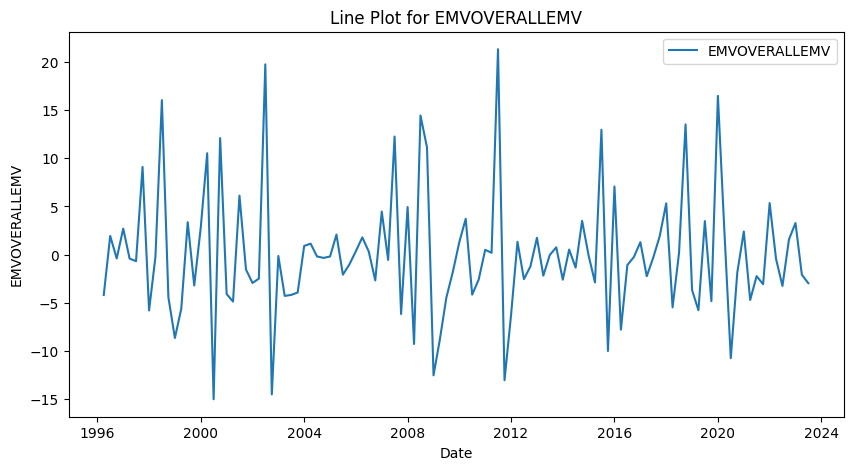

ADF Test for TB3MS:
ADF Statistic: -4.1882326458134385
P-value: 0.0006897814226882839
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}


Stationary Time-Series with 95% certainty




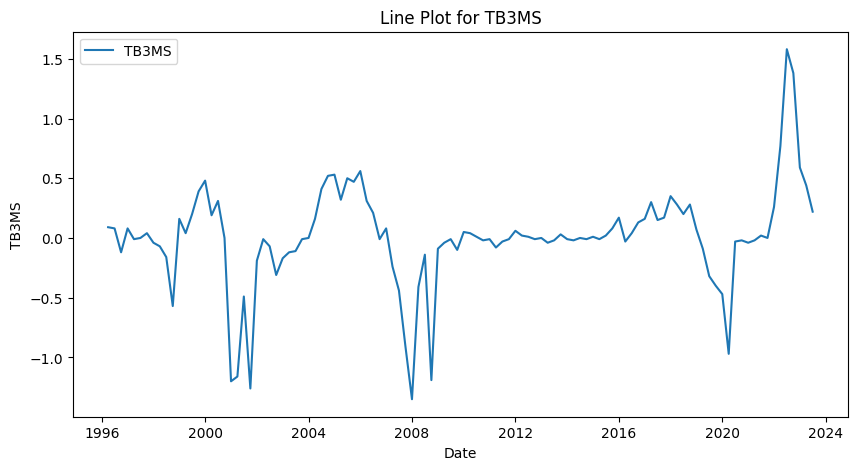

ADF Test for INFECTDISEMVTRACK:
ADF Statistic: -12.881962668406167
P-value: 4.638483672390207e-24
Critical Values: {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}


Stationary Time-Series with 95% certainty




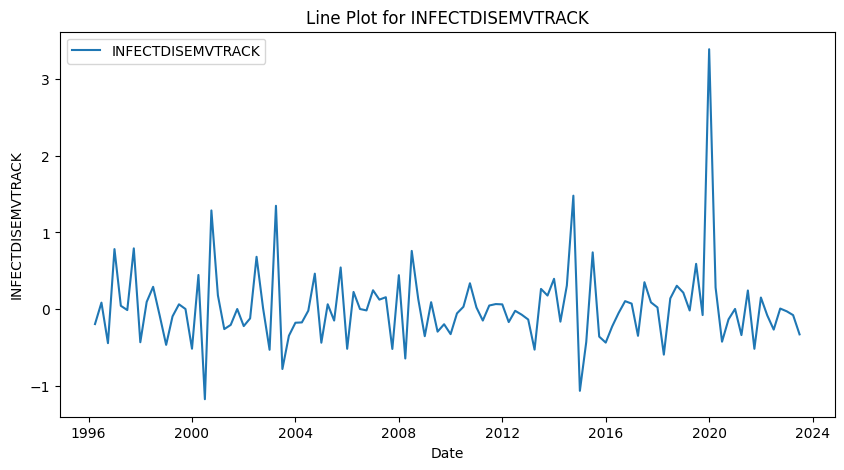

ADF Test for POILBREUSDQ:
ADF Statistic: -8.181926670076118
P-value: 8.08792353527359e-13
Critical Values: {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}


Stationary Time-Series with 95% certainty




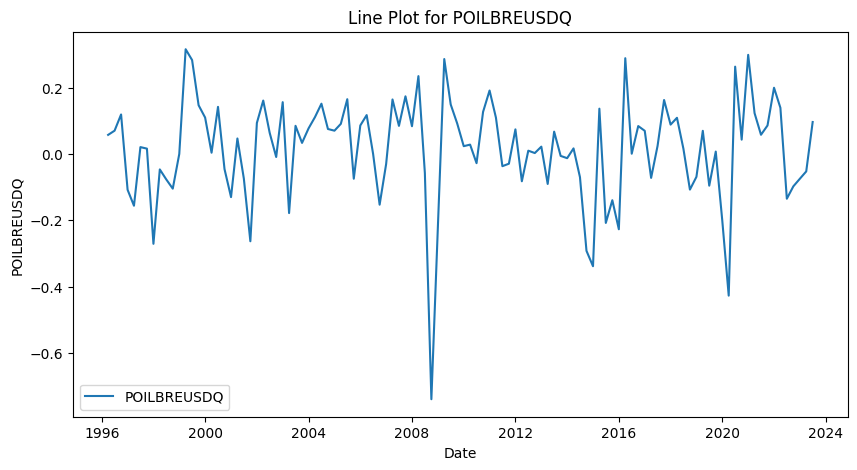

ADF Test for POILWTIUSDQ:
ADF Statistic: -8.642782451827195
P-value: 5.369777647945037e-14
Critical Values: {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}


Stationary Time-Series with 95% certainty




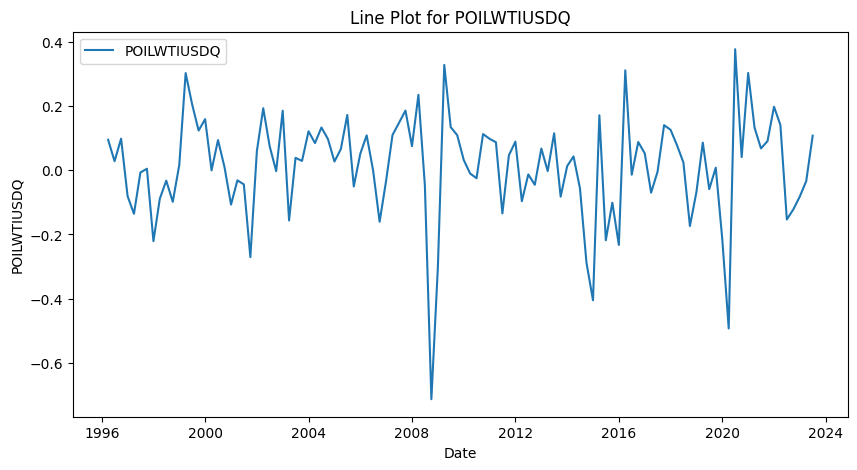

ADF Test for POILDUBUSDQ:
ADF Statistic: -7.701411823866488
P-value: 1.3362406904555227e-11
Critical Values: {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}


Stationary Time-Series with 95% certainty




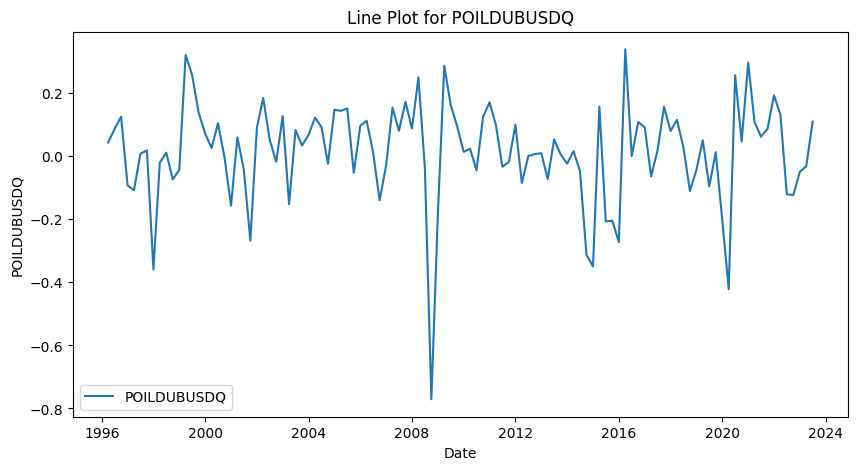

ADF Test for PNGASEUUSDQ:
ADF Statistic: -4.520344758815619
P-value: 0.0001806486517733699
Critical Values: {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}


Stationary Time-Series with 95% certainty




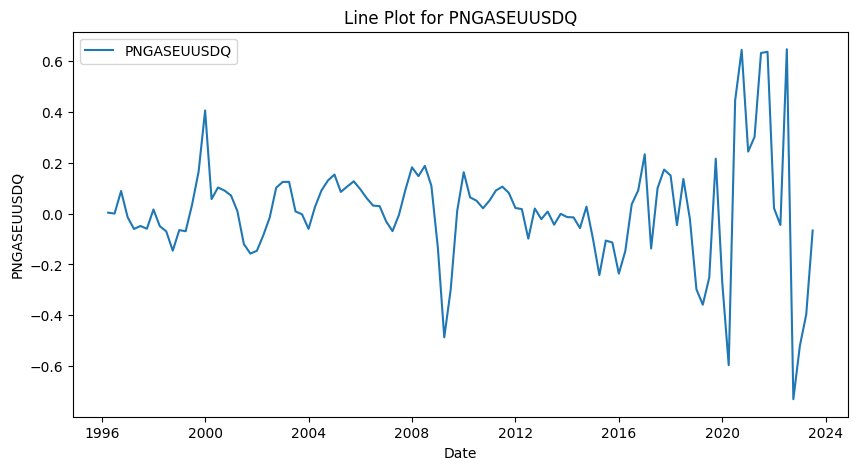

ADF Test for PNGASUSUSDQ:
ADF Statistic: -4.174570459382441
P-value: 0.0007273405835870707
Critical Values: {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}


Stationary Time-Series with 95% certainty




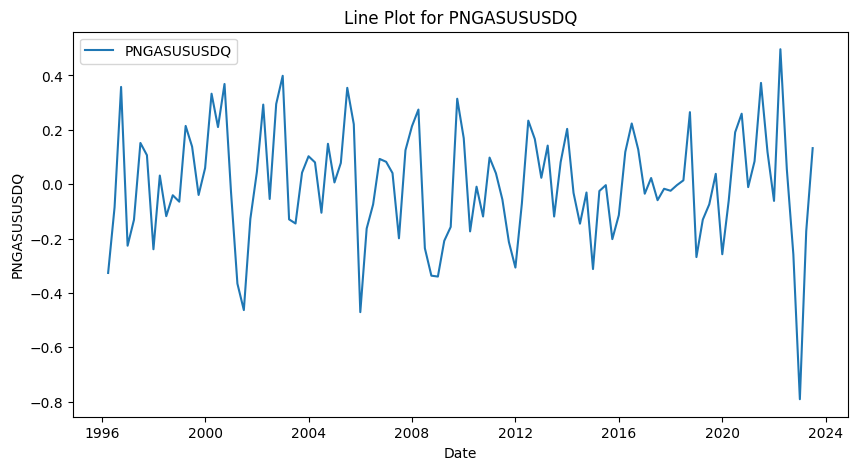

ADF Test for PNGASJPUSDQ:
ADF Statistic: -6.317894899939241
P-value: 3.1177573362590574e-08
Critical Values: {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}


Stationary Time-Series with 95% certainty




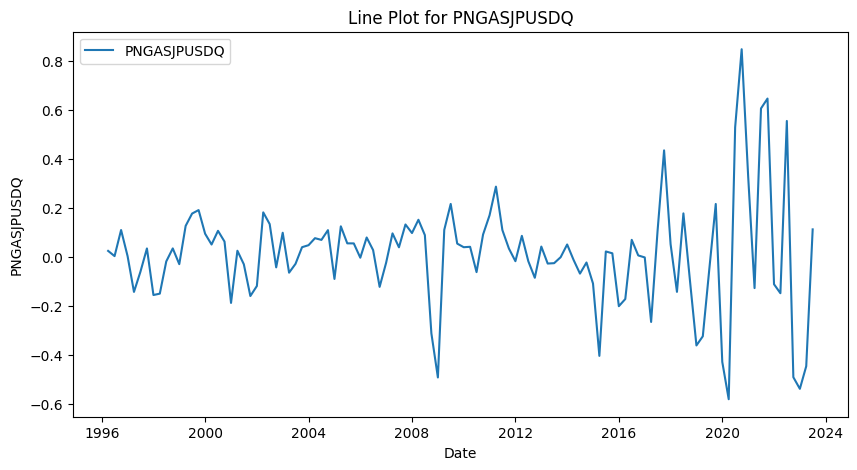

In [11]:
for column in pruned_df.columns[1:10]:  # Exclude 'Date' and lags columns
    # ADF Test for stationarity
    result = adfuller(pruned_df[column])
    print(f"ADF Test for {column}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    print("\n")
    
    if (result[1] <= 0.05):
        print("Stationary Time-Series with 95% certainty")
    else:
        print("Non-stationarity")
    print("\n")

    # Line plot
    plt.figure(figsize=(10, 5))
    plt.plot(pruned_df.index, pruned_df[column], label=column)
    plt.title(f"Line Plot for {column}")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()
    plt.show()

## Kwiatkowski-Phillips-Schmidt-Shin test for stationarity

In [12]:
result = kpss(pruned_df['GDP'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.15764002294290225,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [13]:
result = kpss(pruned_df['EMVOVERALLEMV'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.10732672278112046,
 0.1,
 24,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [14]:
result = kpss(pruned_df['TB3MS'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.2101132559183463,
 0.1,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [15]:
result = kpss(pruned_df['INFECTDISEMVTRACK'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.07681497367218312,
 0.1,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [16]:
result = kpss(pruned_df['POILBREUSDQ'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.07454554814030198,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [17]:
result = kpss(pruned_df['POILWTIUSDQ'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.07697301497185483,
 0.1,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [18]:
result = kpss(pruned_df['POILDUBUSDQ'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.07455160019600292,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [19]:
result = kpss(pruned_df['PNGASEUUSDQ'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.036734839189686216,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [20]:
result = kpss(pruned_df['PNGASUSUSDQ'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.0429398454016928,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [21]:
result = kpss(pruned_df['PNGASJPUSDQ'])

p_value = result[1]

if p_value >= 0.05:
    print("Likely stationary")
else:
    print("Likely non-stationary")
print(p_value)
result

Likely stationary
0.1


C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.04049499847048889,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## Saving

### Full Dataset

In [22]:
pruned_df.to_excel("Stationary Data/ALL.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [23]:
pruned_df

,GDP,EMVOVERALLEMV,TB3MS,INFECTDISEMVTRACK,POILBREUSDQ,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ,...,POILDUBUSDQ_LAG3,PNGASEUUSDQ_LAG3,PNGASUSUSDQ_LAG3,PNGASJPUSDQ_LAG3,POILBREUSDQ_LAG4,POILWTIUSDQ_LAG4,POILDUBUSDQ_LAG4,PNGASEUUSDQ_LAG4,PNGASUSUSDQ_LAG4,PNGASJPUSDQ_LAG4
DATE,,,,,,,,,,,,,,,,,,,,,
1996-04-01,0.020675,-4.19,0.09,-0.196710,0.057457,0.095448,0.043716,0.003724,-0.326614,0.023906,...,-0.099804,0.029306,-0.069429,-0.099806,0.070204,0.049957,0.039103,0.037883,0.082587,0.059800
1996-07-01,0.012196,1.94,0.08,0.083382,0.070075,0.028554,0.086337,0.000000,-0.085062,0.002621,...,0.037740,-0.014546,0.335538,0.000000,-0.112738,-0.077023,-0.099804,0.029306,-0.069429,-0.099806
1996-10-01,0.015662,-0.40,-0.12,-0.446287,0.118992,0.099040,0.125413,0.088868,0.357609,0.109019,...,0.038786,-0.018485,0.411676,0.081163,0.046047,0.016658,0.037740,-0.014546,0.335538,0.000000
1997-01-01,0.012380,2.70,0.08,0.782759,-0.108166,-0.080447,-0.092554,-0.013699,-0.226417,0.002345,...,0.043716,0.003724,-0.326614,0.023906,0.083498,0.084944,0.038786,-0.018485,0.411676,0.081163
1997-04-01,0.018502,-0.41,-0.01,0.041964,-0.156260,-0.135538,-0.107701,-0.060409,-0.131192,-0.143281,...,0.086337,0.000000,-0.085062,0.002621,0.057457,0.095448,0.043716,0.003724,-0.326614,0.023906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.017477,-3.25,1.58,-0.269102,-0.135178,-0.153171,-0.120893,0.646442,0.054559,0.553581,...,0.086578,0.636412,0.118041,0.644932,0.057745,0.068518,0.061986,0.631536,0.372376,0.604677
2022-10-01,0.015792,1.58,1.38,0.005921,-0.097746,-0.121634,-0.123073,-0.730063,-0.258201,-0.491094,...,0.193102,0.021344,-0.061656,-0.112020,0.085771,0.091224,0.086578,0.636412,0.118041,0.644932
2023-01-01,0.015227,3.28,0.59,-0.029960,-0.074871,-0.081122,-0.049533,-0.520405,-0.791079,-0.538396,...,0.132084,-0.044776,0.496246,-0.148651,0.199588,0.198614,0.193102,0.021344,-0.061656,-0.112020


### Brent

In [24]:
dfs = pruned_df[['POILBREUSDQ','POILBREUSDQ_LAG1','POILBREUSDQ_LAG2','POILBREUSDQ_LAG3','POILBREUSDQ_LAG4',
                 'GDP', 'EMVOVERALLEMV', 'TB3MS','INFECTDISEMVTRACK']]
dfs = dfs.set_index(pruned_df.index)

dfs.to_excel("Stationary Data/BRENT.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### WTI

In [25]:
dfs = pruned_df[['POILWTIUSDQ','POILWTIUSDQ_LAG1','POILWTIUSDQ_LAG2','POILWTIUSDQ_LAG3','POILWTIUSDQ_LAG4',
                 'GDP', 'EMVOVERALLEMV', 'TB3MS','INFECTDISEMVTRACK']]
dfs = dfs.set_index(pruned_df.index)

dfs.to_excel("Stationary Data/WTI.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### Dubai

In [26]:
dfs = pruned_df[['POILDUBUSDQ','POILDUBUSDQ_LAG1','POILDUBUSDQ_LAG2','POILDUBUSDQ_LAG3','POILDUBUSDQ_LAG4',
                 'GDP', 'EMVOVERALLEMV', 'TB3MS','INFECTDISEMVTRACK']]
dfs = dfs.set_index(pruned_df.index)

dfs.to_excel("Stationary Data/Dubai.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### EUNG

In [27]:
dfs = pruned_df[['PNGASEUUSDQ','PNGASEUUSDQ_LAG1','PNGASEUUSDQ_LAG2','PNGASEUUSDQ_LAG3','PNGASEUUSDQ_LAG4',
                 'GDP', 'EMVOVERALLEMV', 'TB3MS','INFECTDISEMVTRACK']]
dfs = dfs.set_index(pruned_df.index)

dfs.to_excel("Stationary Data/EUNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### Henry Hub

In [28]:
dfs = pruned_df[['PNGASUSUSDQ','PNGASUSUSDQ_LAG1','PNGASUSUSDQ_LAG2','PNGASUSUSDQ_LAG3','PNGASUSUSDQ_LAG4',
                 'GDP', 'EMVOVERALLEMV', 'TB3MS','INFECTDISEMVTRACK']]
dfs = dfs.set_index(pruned_df.index)

dfs.to_excel("Stationary Data/HENRYHUB.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


### Asian LNG

In [29]:
dfs = pruned_df[['PNGASJPUSDQ','PNGASJPUSDQ_LAG1','PNGASJPUSDQ_LAG2','PNGASJPUSDQ_LAG3','PNGASJPUSDQ_LAG4',
                 'GDP', 'EMVOVERALLEMV', 'TB3MS','INFECTDISEMVTRACK']]
dfs = dfs.set_index(pruned_df.index)

dfs.to_excel("Stationary Data/ASIALNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


## Full dataset Corellation Heat Map

In [30]:
# Calculate the correlation matrix
correlation_matrix = pruned_df.corr()

# Display the correlation matrix
correlation_matrix

,GDP,EMVOVERALLEMV,TB3MS,INFECTDISEMVTRACK,POILBREUSDQ,POILWTIUSDQ,POILDUBUSDQ,PNGASEUUSDQ,PNGASUSUSDQ,PNGASJPUSDQ,...,POILDUBUSDQ_LAG3,PNGASEUUSDQ_LAG3,PNGASUSUSDQ_LAG3,PNGASJPUSDQ_LAG3,POILBREUSDQ_LAG4,POILWTIUSDQ_LAG4,POILDUBUSDQ_LAG4,PNGASEUUSDQ_LAG4,PNGASUSUSDQ_LAG4,PNGASJPUSDQ_LAG4
GDP,1.000000,-0.167037,0.351530,-0.199205,0.489091,0.537531,0.481957,0.438112,0.175935,0.467970,...,0.071351,0.175038,0.058071,0.135312,-0.075813,-0.069132,-0.063612,0.102509,0.038295,0.152464
EMVOVERALLEMV,-0.167037,1.000000,-0.034947,0.516319,-0.252001,-0.268238,-0.227539,-0.048562,-0.082301,-0.059657,...,0.024714,-0.096075,0.043820,-0.109984,0.083522,0.091485,0.098234,-0.030641,-0.160580,-0.003683
TB3MS,0.351530,-0.034947,1.000000,-0.127712,0.241749,0.225194,0.231338,0.064841,0.067589,0.097704,...,0.158272,0.215859,0.019061,0.198595,0.108917,0.091768,0.099642,0.249092,-0.010675,0.228947
INFECTDISEMVTRACK,-0.199205,0.516319,-0.127712,1.000000,-0.261077,-0.236911,-0.237795,-0.119035,-0.069029,-0.134539,...,-0.022698,-0.066086,-0.022239,-0.089688,0.106813,0.120409,0.119170,-0.100421,-0.049985,-0.036284
POILBREUSDQ,0.489091,-0.252001,0.241749,-0.261077,1.000000,0.973004,0.986034,0.222386,0.367645,0.454272,...,-0.055508,-0.013815,-0.082656,0.025442,-0.028131,-0.053672,-0.012776,-0.042349,-0.081216,-0.102919
POILWTIUSDQ,0.537531,-0.268238,0.225194,-0.236911,0.973004,1.000000,0.957463,0.236879,0.364786,0.462505,...,-0.085065,-0.009088,-0.069644,0.018785,-0.031533,-0.054471,-0.023760,-0.048071,-0.094521,-0.101296
POILDUBUSDQ,0.481957,-0.227539,0.231338,-0.237795,0.986034,0.957463,1.000000,0.209455,0.352885,0.435099,...,-0.049838,-0.002538,-0.080353,0.036122,0.001273,-0.021811,0.016129,-0.040727,-0.053337,-0.098499
PNGASEUUSDQ,0.438112,-0.048562,0.064841,-0.119035,0.222386,0.236879,0.209455,1.000000,0.408669,0.774211,...,0.230588,0.141862,0.089487,0.279134,-0.073626,-0.065259,-0.081146,0.089144,0.062821,0.202426
PNGASUSUSDQ,0.175935,-0.082301,0.067589,-0.069029,0.367645,0.364786,0.352885,0.408669,1.000000,0.423489,...,0.009811,0.050240,-0.142738,0.147333,-0.134173,-0.144091,-0.146442,0.037575,-0.074035,0.012357
PNGASJPUSDQ,0.467970,-0.059657,0.097704,-0.134539,0.454272,0.462505,0.435099,0.774211,0.423489,1.000000,...,-0.119460,0.060095,-0.154187,0.093956,-0.058219,-0.064642,-0.050595,0.229120,0.054539,0.320355


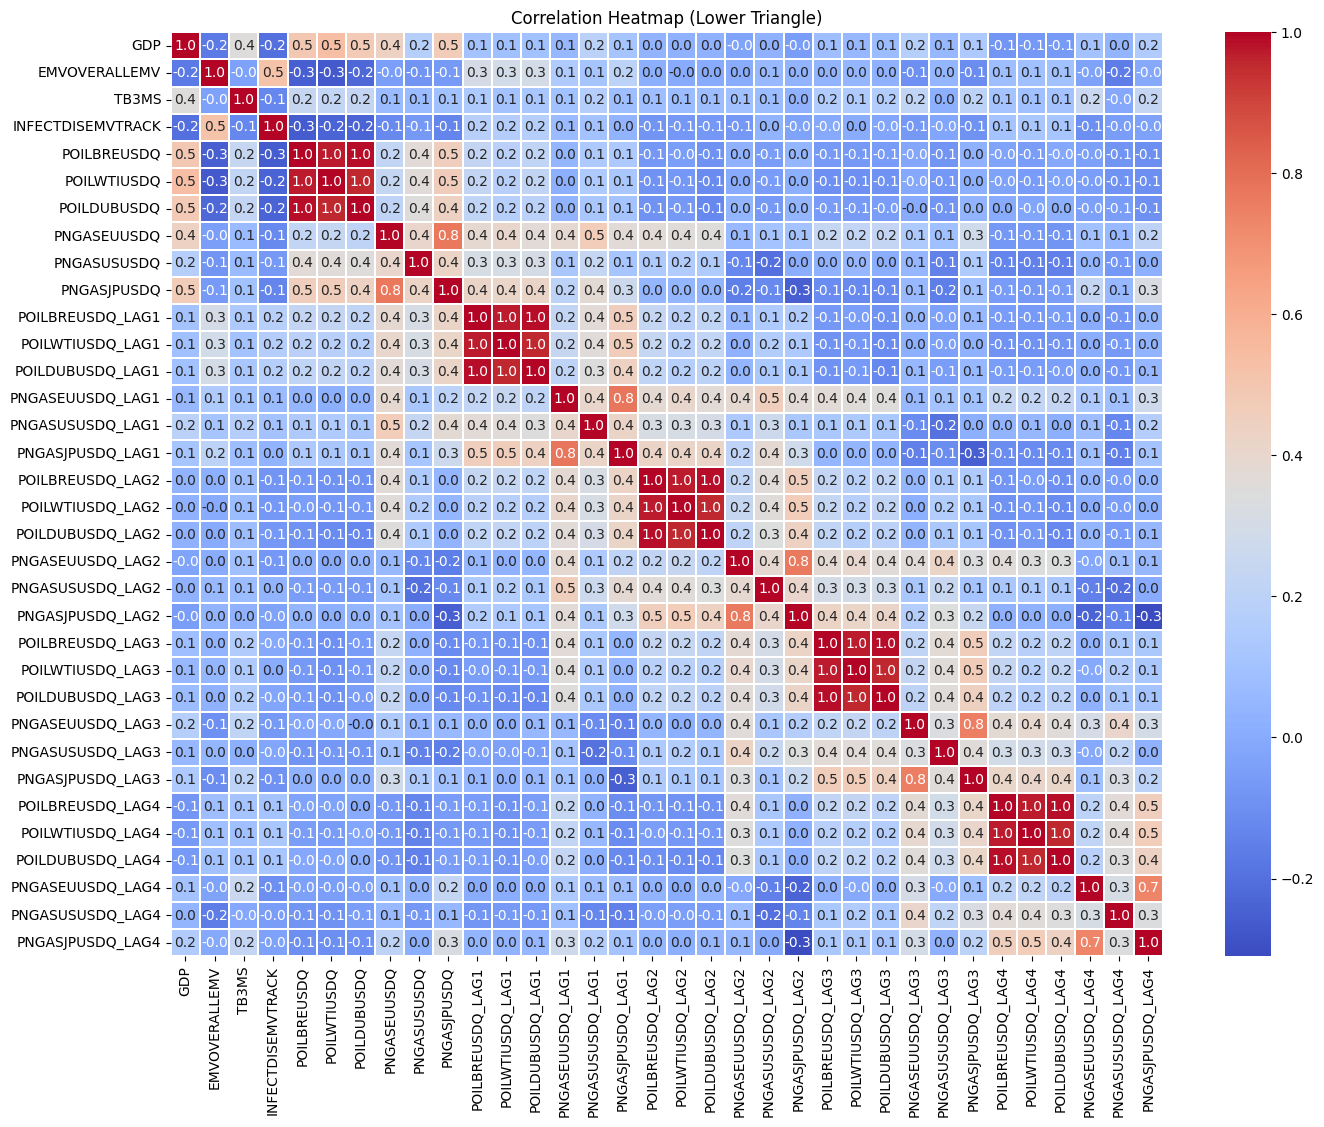

In [31]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.01)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()